## CFC BEV program 

Calculate here the impact of the Cash for Clunker CFC program

Import and run necessary scripts to import some libraries, functions, variables etc. 

In [126]:
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")


In [127]:
# This is a helper file where libraries are imported and some basic functions and variables are defined.
%run "C:/Users/Andrea/OneDrive - NTNU/Attachments/PSI/jupyter/simplified car calculator/initialize_notebook.ipynb"

In [128]:
%matplotlib inline
plt.style.use('seaborn')

ERROR:root:File `'initialize_notebook.ipynb.py'` not found.


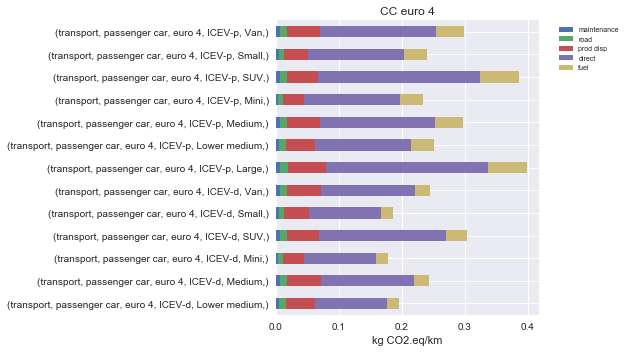

ERROR:root:File `'Input_data.ipynb.py'` not found.


NameError: name 'a_g' is not defined

In [129]:
#Run this file to have the LCA results for all euro classes for conventional vehicles 
%run "C:/Users/Andrea/OneDrive - NTNU/Attachments/PSI/jupyter/simplified car calculator/cashForClunkersCalc.ipynb"

## LCA results for BEV 

Calculate the LCA results for BEVs and conventional vehicles to create dataframes used in calculations: 

In [130]:
car_db = Database('Cars')
lca = LCA({car_db.random(): 1}, method=lcia_methods['CC'])
lca.lci(factorize=True)
lca.lcia()
lca.score

car_lca = contribution_LCA_to_df([x for x in car_db], cats=['CC', 'MD', 'POF', 'PMF'], names=['name'])

In [131]:
#Need to restructure the columns for aggregating (since also BEV now)
 
cols_prod = ['Battery BoP', 'Market for battery cell', 'Glider lightweighting', 'market for charger, electric passenger car', 'market for converter, for electric passenger car', 'market for electric motor, electric passenger car',
       'market for glider, passenger car',
       'market for heat, central or small-scale, natural gas',
       'market for internal combustion engine, passenger car',
       'market for inverter, for electric passenger car',
       'market for manual dismantling of used electric passenger car',
        'market for manual dismantling of used passenger car with internal combustion engine', 'market for power distribution unit, for electric passenger car', 'market for used powertrain from electric passenger car, manual dismantling', 'polyethylene production, high density, granulate']


cols_direct = ['Ammonia', 'Benzene', 'Carbon dioxide, fossil', 'Carbon monoxide, fossil', 'Dinitrogen monoxide', 'Methane, fossil', 'NMVOC, non-methane volatile organic compounds, unspecified origin','Nitrogen oxides', 'Particulates, > 2.5 um, and < 10um',  'Sulfur dioxide', 'market for road wear emissions, passenger car',
       'market for tyre wear emissions, passenger car', 'market for brake wear emissions, passenger car']

cols_fuel = ['market for diesel', 'market for petrol, low-sulfur', 'market for electricity, low voltage']

for cat in ['CC', 'MD', 'POF', 'PMF']: 
    if cat == 'CC': 
        db1 = agg_lca(car_lca,cat)
    if cat == 'MD': 
        db2 = agg_lca(car_lca,cat)
    if cat == 'POF': 
        db3 = agg_lca(car_lca,cat)
    else: 
        db4 = agg_lca(car_lca, cat)

#Return only the BEV in a df        
car_lca_agg = pd.concat([db1, db2, db3, db4], keys = ['CC', 'MD', 'POF', 'PMF'], axis = 1)[0:7]

In [132]:
car_lca_agg.head(2)

CC  \
                                                   maintenance, passenger car   
(transport, passenger car, current, BEV, Large,)                     0.008862   
(transport, passenger car, current, BEV, Lower ...                   0.006604   

                                                                              \
                                                   market for road prod_disp   
(transport, passenger car, current, BEV, Large,)          0.014976  0.118575   
(transport, passenger car, current, BEV, Lower ...        0.011432  0.086181   

                                                                     \
                                                   direct      fuel   
(transport, passenger car, current, BEV, Large,)      0.0  0.166477   
(transport, passenger car, current, BEV, Lower ...    0.0  0.138664   

                                                                           MD  \
                                                   maintenance, passenger car   
(transport, passenger car, current, BEV, Large,)                     0.000854   
(transport, passenger car, current, BEV, Lower ...                   0.000636   

                                                                              \
                                                   market for road prod_disp   
(transport, passenger car, current, BEV, Large,)          0.001254  0.068355   
(transport, passenger car, current, BEV, Lower ...        0.000957  0.049606   

                                                                     \
                                                   direct      fuel   
(transport, passenger car, current, BEV, Large,)      0.0  0.004098   
(transport, passenger car, current, BEV, Lower ...    0.0  0.003414   

                                                                          POF  \
                                                   maintenance, passenger car   
(transport, passenger car, current, BEV, Large,)                     0.000032   
(transport, passenger car, current, BEV, Lower ...                   0.000024   

                                                                              \
                                                   market for road prod_disp   
(transport, passenger car, current, BEV, Large,)          0.000158  0.000498   
(transport, passenger car, current, BEV, Lower ...        0.000121  0.000363   

                                                                            \
                                                          direct      fuel   
(transport, passenger car, current, BEV, Large,)    1.054705e-08  0.000224   
(transport, passenger car, current, BEV, Lower ...  8.051152e-09  0.000186   

                                                                          PMF  \
                                                   maintenance, passenger car   
(transport, passenger car, current, BEV, Large,)                     0.000013   
(transport, passenger car, current, BEV, Lower ...                   0.000010   

                                                                              \
                                                   market for road prod_disp   
(transport, passenger car, current, BEV, Large,)          0.000073  0.000404   
(transport, passenger car, current, BEV, Lower ...        0.000055  0.000291   

                                                                        
                                                      direct      fuel  
(transport, passenger car, current, BEV, Large,)    0.000021  0.000125  
(transport, passenger car, current, BEV, Lower ...  0.000016  0.000104

In [133]:
car_db = Database('Cars marginal mix')
lca = LCA({car_db.random(): 1}, method=lcia_methods['CC'])
lca.lci(factorize=True)
lca.lcia()
lca.score

car_lca = contribution_LCA_to_df([x for x in car_db], cats=['CC', 'MD', 'POF', 'PMF'], names=['name'])

#Need to restructure the columns for aggregating (since also BEV now)
 
cols_prod = ['Battery BoP', 'Market for battery cell', 'Glider lightweighting', 'market for charger, electric passenger car', 'market for converter, for electric passenger car', 'market for electric motor, electric passenger car',
       'market for glider, passenger car',
       'market for heat, central or small-scale, natural gas',
       'market for internal combustion engine, passenger car',
       'market for inverter, for electric passenger car',
       'market for manual dismantling of used electric passenger car',
        'market for manual dismantling of used passenger car with internal combustion engine', 'market for power distribution unit, for electric passenger car', 'market for used powertrain from electric passenger car, manual dismantling', 'polyethylene production, high density, granulate']


cols_direct = ['Ammonia', 'Benzene', 'Carbon dioxide, fossil', 'Carbon monoxide, fossil', 'Dinitrogen monoxide', 'Methane, fossil', 'NMVOC, non-methane volatile organic compounds, unspecified origin','Nitrogen oxides', 'Particulates, > 2.5 um, and < 10um',  'Sulfur dioxide', 'market for road wear emissions, passenger car',
       'market for tyre wear emissions, passenger car', 'market for brake wear emissions, passenger car']

cols_fuel = ['market for diesel', 'market for petrol, low-sulfur', 'market for electricity, low voltage']

for cat in ['CC', 'MD', 'POF', 'PMF']: 
    if cat == 'CC': 
        db1 = agg_lca(car_lca,cat)
    if cat == 'MD': 
        db2 = agg_lca(car_lca,cat)
    if cat == 'POF': 
        db3 = agg_lca(car_lca,cat)
    else: 
        db4 = agg_lca(car_lca, cat)

#Return only the BEV in a df        
car_lca_agg_marginal = pd.concat([db1, db2, db3, db4], keys = ['CC', 'MD', 'POF', 'PMF'], axis = 1)[0:7]

This is the dataframe with LCA results for conventional cars: 

In [134]:
db_lca_agg.head(2)


CC  \
                                                              maintenance, passenger car   
pre euro 0 (transport, passenger car, pre euro 0, ICEV-d, ...                   0.007558   
           (transport, passenger car, pre euro 0, ICEV-d, ...                   0.005874   

                                                                               \
                                                              market for road   
pre euro 0 (transport, passenger car, pre euro 0, ICEV-d, ...        0.012929   
           (transport, passenger car, pre euro 0, ICEV-d, ...        0.010286   

                                                                         \
                                                              prod_disp   
pre euro 0 (transport, passenger car, pre euro 0, ICEV-d, ...  0.060523   
           (transport, passenger car, pre euro 0, ICEV-d, ...  0.046928   

                                                                         \
                                                                 direct   
pre euro 0 (transport, passenger car, pre euro 0, ICEV-d, ...  0.239817   
           (transport, passenger car, pre euro 0, ICEV-d, ...  0.103105   

                                                                         \
                                                                   fuel   
pre euro 0 (transport, passenger car, pre euro 0, ICEV-d, ...  0.038895   
           (transport, passenger car, pre euro 0, ICEV-d, ...  0.016313   

                                                                                      MD  \
                                                              maintenance, passenger car   
pre euro 0 (transport, passenger car, pre euro 0, ICEV-d, ...                   0.000728   
           (transport, passenger car, pre euro 0, ICEV-d, ...                   0.000566   

                                                                               \
                                                              market for road   
pre euro 0 (transport, passenger car, pre euro 0, ICEV-d, ...        0.001083   
           (transport, passenger car, pre euro 0, ICEV-d, ...        0.000861   

                                                                         \
                                                              prod_disp   
pre euro 0 (transport, passenger car, pre euro 0, ICEV-d, ...  0.027296   
           (transport, passenger car, pre euro 0, ICEV-d, ...  0.021097   

                                                                      \
                                                              direct   
pre euro 0 (transport, passenger car, pre euro 0, ICEV-d, ...    0.0   
           (transport, passenger car, pre euro 0, ICEV-d, ...    0.0   

                                                                         \
                                                                   fuel   
pre euro 0 (transport, passenger car, pre euro 0, ICEV-d, ...  0.001154   
           (transport, passenger car, pre euro 0, ICEV-d, ...  0.000484   

                                                                                     POF  \
                                                              maintenance, passenger car   
pre euro 0 (transport, passenger car, pre euro 0, ICEV-d, ...                   0.000027   
           (transport, passenger car, pre euro 0, ICEV-d, ...                   0.000021   

                                                                               \
                                                              market for road   
pre euro 0 (transport, passenger car, pre euro 0, ICEV-d, ...        0.000137   
           (transport, passenger car, pre euro 0, ICEV-d, ...        0.000109   

                                                                         \
                                                              prod_disp   
pre euro 0 (transport, passenger car, pre euro 0, ICEV-d, ..

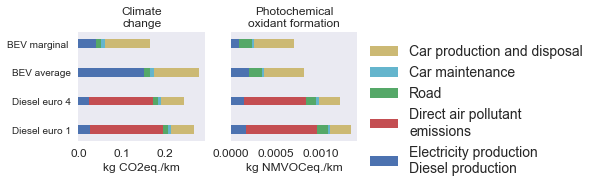

In [135]:
#car_lca_agg.iloc[2]['CC'].plot.bar(stacked=True)
euro4_medium = db_lca_agg.loc['euro 4'].iloc[2]['CC']
euro1_medium = db_lca_agg.loc['euro 1'].iloc[2]['CC']
bev_medium = car_lca_agg.iloc[2]['CC']
bev_medium_marginal = car_lca_agg_marginal.iloc[2]['CC']
changed_color_order = sns.color_palette()[0], sns.color_palette()[2], sns.color_palette()[1], sns.color_palette()[-1], sns.color_palette()[4]
fig = plt.figure(figsize = [5,2])
ax = fig.add_subplot(1,2,1)
pd.concat([euro1_medium, euro4_medium, bev_medium, bev_medium_marginal], keys = ['Diesel euro 1','Diesel euro 4', 'BEV average', 'BEV marginal ']).unstack()[['fuel', 'direct', 'market for road', 'maintenance, passenger car', 'prod_disp']].plot.barh(color = changed_color_order,width = 0.3,stacked = True, ax = ax, legend = None, title = 'Climate\nchange')
ax1 = fig.add_subplot(1,2,2)
euro4_medium = db_lca_agg.loc['euro 4'].iloc[2]['POF']
euro1_medium = db_lca_agg.loc['euro 1'].iloc[2]['POF']
bev_medium = car_lca_agg.iloc[2]['POF']
bev_medium_marginal = car_lca_agg_marginal.iloc[2]['POF']
pd.concat([euro1_medium, euro4_medium, bev_medium, bev_medium_marginal], keys = ['Diesel euro 1','Diesel euro 4', 'BEV average', 'BEV marginal ']).unstack()[['fuel', 'direct', 'market for road', 'maintenance, passenger car', 'prod_disp']].plot.barh(color=changed_color_order,width = 0.3, stacked = True, ax = ax1, legend = None, title = 'Photochemical\noxidant formation')
ax1.set_yticks([])
ax1.tick_params(labelsize=12, axis = 'x')
ax.tick_params(labelsize=12, axis = 'x')
ax.grid(False)
ax1.grid(False)
handles, labels = ax1.get_legend_handles_labels()
labels = ['Electricity production\nDiesel production', 'Direct air pollutant\nemissions', 'Road', 'Car maintenance', 'Car production and disposal']
ax1.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor = (1,1), fontsize = 14)
ax1.set_xlabel('kg NMVOCeq./km', fontsize = 12)
ax.set_xlabel('kg CO2eq./km', fontsize = 12)
plt.savefig('Intro LCA results.svg', bbox_inches = 'tight')


In [136]:
[act for act in Database('ecoinvent 3.5_cutoff') if act['name'] == 'market group for electricity' and act['location'] == 'CN']

[]

## Cash for clunker calculation 

In this section the comparasion between the two different scenarios are considered: either BAU or CFC. 
BAU implies that the old cars are driven during the period between early and natural scrapping, while CFC implies that the BEV are driven in this period. Additionally, CFC needs to account for the production and disposal emissions from these BEVs attributed to the specific period. 

First, the distribution/dataframes for old and new cars are imported from the script: 

2575158.0
1237060.0


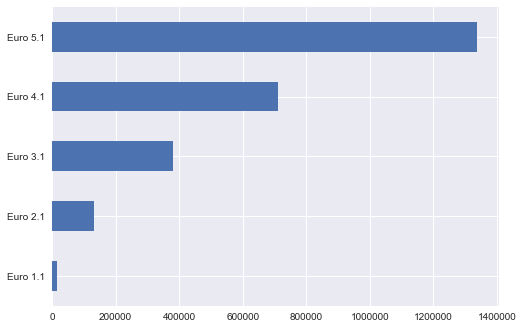

146700.0
5.696737831232103
[('09162  MUENCHEN,STADT                   ', 0.26567474489089693), ('05119  OBERHAUSEN,STADT                 ', 0.44483982534653826), ('15091  WITTENBERG                       ', 0.10103133941047308)]
[('05911  BOCHUM,STADT                     ', 0.43003293285357075), ('05314  BONN,STADT                       ', 0.5319831986632179), ('08111  STUTTGART,STADT                  ', 0.2251357052172783)]
08111  STUTTGART,STADT             
08115  BOEBLINGEN                  
08116  ESSLINGEN                   
08118  LUDWIGSBURG                 
08119  REMS-MURR-KREIS             
08121  HEILBRONN,STADT             
08135  HEIDENHEIM                  
08222  MANNHEIM,STADT              
08236  ENZKREIS                    
08311  FREIBURG I.BREISG.STADT     
08415  REUTLINGEN                  
08416  TUEBINGEN                   
09162  MUENCHEN,STADT              
09564  NUERNBERG,STADT             
09761  AUGSBURG,STADT              
11000  BERLIN                  

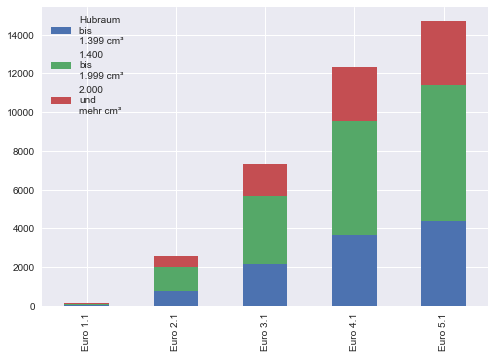

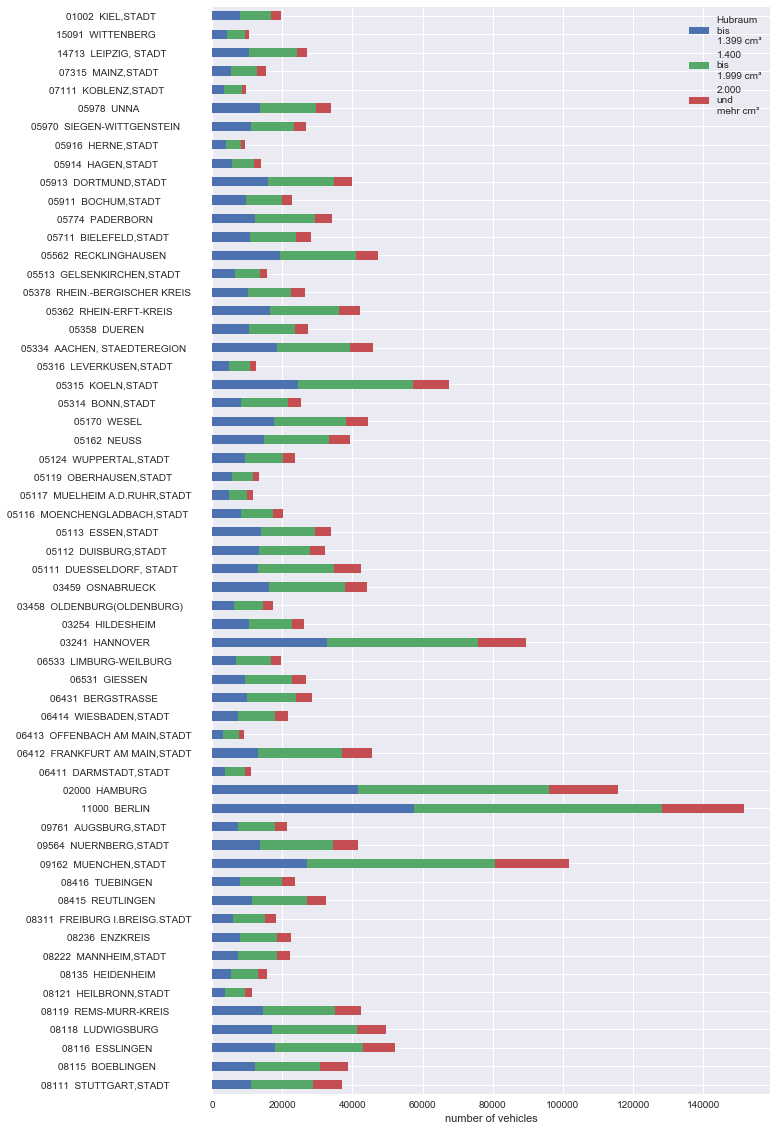

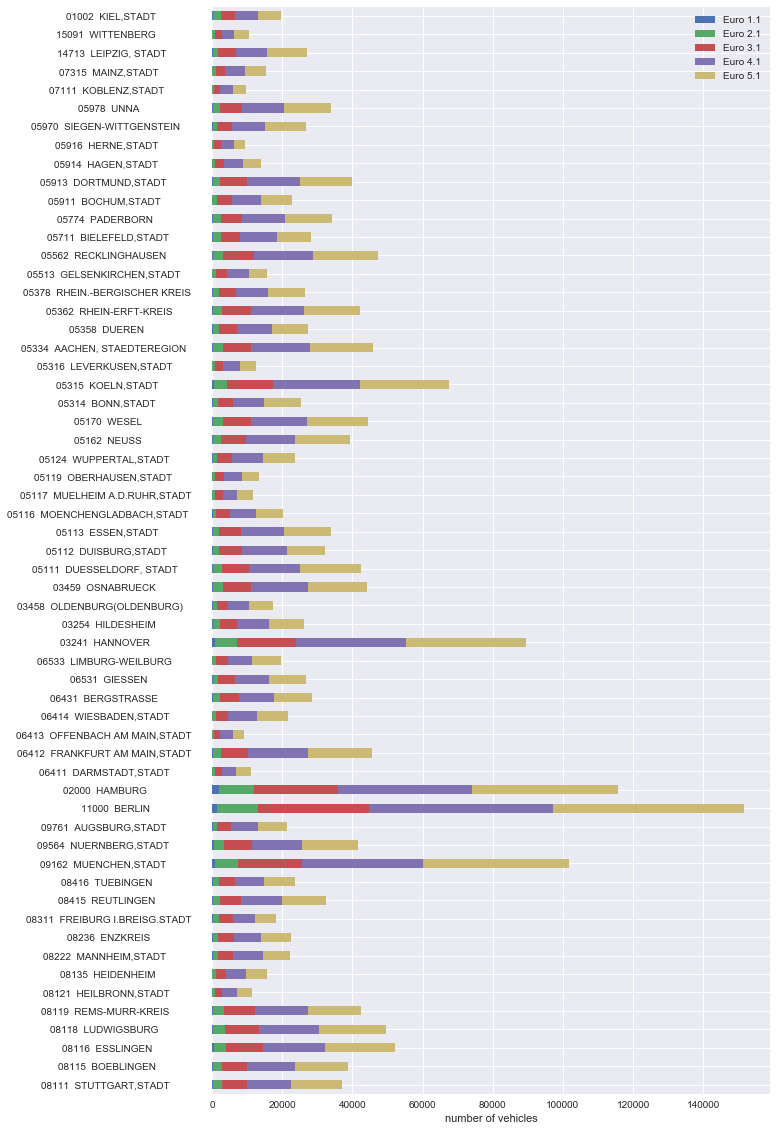

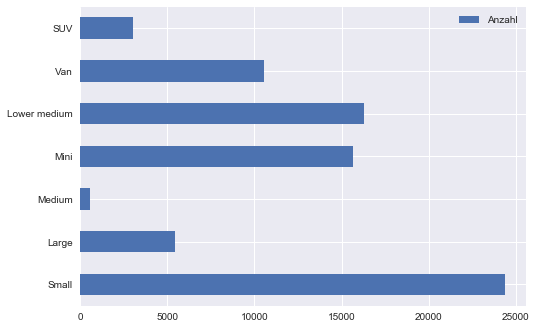

152.0
152.0
2583.0
2583.0
7311.0
7311.0
12332.0
12332.0
14705.760325476906
14705.760325476906
229.0
229.0
2471.9999999999995
2471.9999999999995
7251.0
7251.0
13806.0
13806.0
14981.151231075752
14981.151231075752
423.0
423.0
3556.0
3556.0
10409.0
10409.0
17940.0
17940.0
19832.136375661572
19832.136375661572
193.0
193.0
3352.0
3352.0
9761.0
9761.0
17248.0
17248.0
19137.6723528471
19137.6723528471
260.0
260.0
3238.0
3238.0
8711.999999999998
8711.999999999998
15057.0
15057.0
15084.351549737014
15084.351549737014
39.0
39.0
663.0
663.0
2221.0
2221.0
4269.0
4269.0
4204.415192310279
4204.415192310279
75.0
75.0
968.0000000000001
968.0000000000001
2807.0
2807.0
5850.000000000001
5850.000000000001
5900.663523897352
5900.663523897352
189.0
189.0
1426.0
1426.0
4391.0
4391.0
8379.0
8379.0
7947.564871930157
7947.564871930157
143.0
143.0
1606.0
1606.0
4399.0
4399.0
7862.0
7862.0
8366.637989145787
8366.637989145787
239.0
239.0
1741.0
1741.0
3883.0
3883.0
6376.0
6376.0
6037.503725437151
6037.50372543715

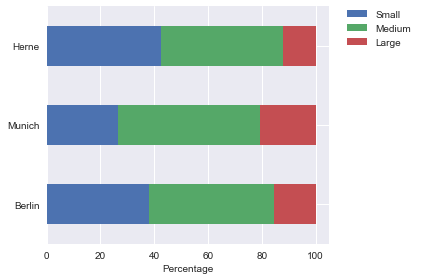

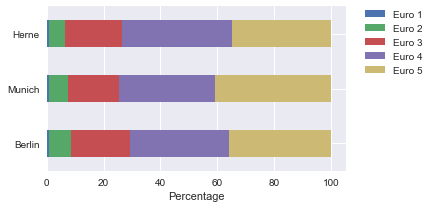

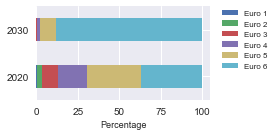

<Figure size 72x72 with 0 Axes>

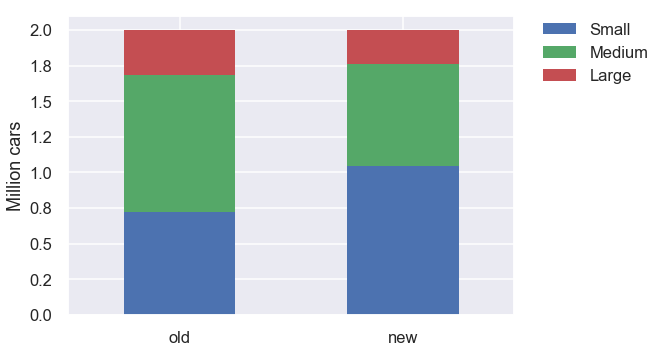

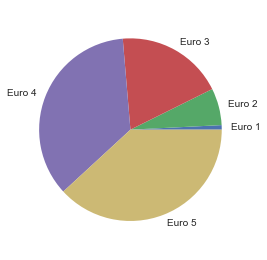

SyntaxError: invalid syntax (<ipython-input-137-42d6484224de>, line 1)

In [137]:
#Run this file to create dataframes for the number of cars of different sizes and emission concepts 
%run Input_data_BEV.ipynb

In [138]:
#From the script above these dataframes are calculated which contains the number of cars (new and old): 
print(df_new.head())
df_old.columns = ['Small', 'Medium', 'Large']
df_old.head(10)

                                            Small        Medium        Large
08111  STUTTGART,STADT               16758.271159  13653.721289  6671.767878
08115  BOEBLINGEN                    18399.498725  14003.516427  6336.136080
08116  ESSLINGEN                     26515.957172  18681.078082  6963.101121
08118  LUDWIGSBURG                   25066.455637  18087.092414  6538.124301
08119  REMS-MURR-KREIS               21375.080221  15206.404536  5769.866793


Small  \
Statistische Kennziffer und Zulassungsbezirk                         
08111  STUTTGART,STADT                       Euro 1.1    45.196978   
                                             Euro 2.1   768.051283   
                                             Euro 3.1  2173.915188   
                                             Euro 4.1  3666.902216   
                                             Euro 5.1  4372.736387   
08115  BOEBLINGEN                            Euro 1.1    72.581970   
                                             Euro 2.1   783.504931   
                                             Euro 3.1  2298.217741   
                                             Euro 4.1  4375.837006   
                                             Euro 5.1  4748.303343   

                                                            Medium  \
Statistische Kennziffer und Zulassungsbezirk                         
08111  STUTTGART,STADT                       Euro 1.1    72.582394   
                                             Euro 2.1  1233.423190   
                                             Euro 3.1  3491.117671   
                                             Euro 4.1  5888.724268   
                                             Euro 5.1  7022.232217   
08115  BOEBLINGEN                            Euro 1.1   108.882964   
                                             Euro 2.1  1175.365445   
                                             Euro 3.1  3447.643543   
                                             Euro 4.1  6564.358952   
                                             Euro 5.1  7123.109821   

                                                             Large  
Statistische Kennziffer und Zulassungsbezirk                        
08111  STUTTGART,STADT                       Euro 1.1    34.220627  
                                             Euro 2.1   581.525527  
                                             Euro 3.1  1645.967141  
                                             Euro 4.1  2776.373517  
                                             Euro 5.1  3310.791722  
08115  BOEBLINGEN                            Euro 1.1    47.535066  
                                             Euro 2.1   513.129624  
                                             Euro 3.1  1505.138716  
                                             Euro 4.1  2865.804042  
                                             Euro 5.1  3109.738067

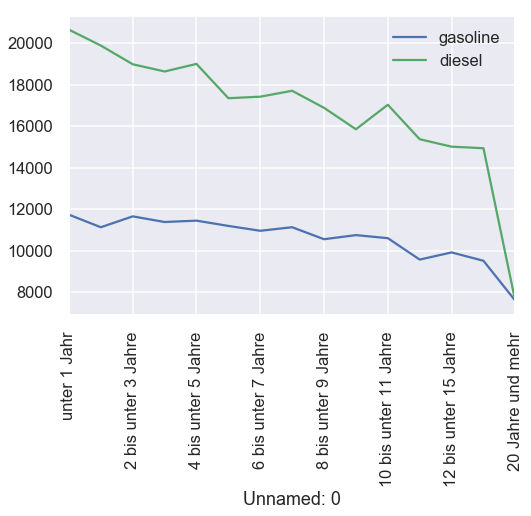

Unnamed: 2
Mini            2.13451
Small           2.13451
Lower medium    2.13451
Medium          4.12542
Large           2.01166
Van             4.12542
SUV             2.01166
dtype: object
Unnamed: 2
Mini            2.13451
Small           2.13451
Lower medium    2.13451
Medium          3.62081
Large           2.01166
Van             3.62081
SUV             2.01166
dtype: object
Unnamed: 2
Mini             1.7015
Small            1.7015
Lower medium     1.7015
Medium          2.30883
Large           1.58303
Van             2.30883
SUV             1.58303
dtype: object
Unnamed: 2
Mini             1.01661
Small            1.01661
Lower medium     1.01661
Medium           1.53623
Large           0.905073
Van              1.53623
SUV             0.905073
dtype: object
Unnamed: 2
Mini            1.06726
Small           1.06726
Lower medium    1.06726
Medium          2.06271
Large           1.00583
Van             2.06271
SUV             1.00583
dtype: object
Unnamed: 2
Mini            1

In [139]:
%run "C:/Users/Andrea/OneDrive - NTNU/Attachments/PSI/jupyter/EstimatingVKT.ipynb"

Assume that old cars are driven the exact same distance to start with - to just assess the technology improvement 

In [140]:
#Dataframe with VKT for old vehicles 
print(df_diesel_BEV.head())
print(df_BEV.head())

          Small   Medium    Large
euro 1  14000.0  14000.0  14000.0
euro 2  14000.0  14000.0  14000.0
euro 3  14000.0  14000.0  14000.0
euro 4  14000.0  14000.0  14000.0
euro 5  14000.0  14000.0  14000.0
     Small  Medium  Large
BEV  16000   16000  16000


Calculate the total VKT driven per vehicle in the period "years remaining". So multiply the annual VKT for each emission concept with the years remaining for each emission concept. Years remaining is calculated in a MATLAB script and the results yields: 

In [141]:
years_left = pd.DataFrame({'Euro 1': [2.69, 1.97,1.01], 'Euro 2': [3.06, 2.46, 1.35], 'Euro 3': [4.2, 3.5, 2.23], 'Euro 4': [5.59,5, 3.7], 'Euro 5':[7.81, 7.33, 6.22]})
years_left.index = ['High', 'Medium', 'Low']
print(years_left)
scenario = 'Medium' #setting the scenario for years remaining

        Euro 1  Euro 2  Euro 3  Euro 4  Euro 5
High      2.69    3.06    4.20    5.59    7.81
Medium    1.97    2.46    3.50    5.00    7.33
Low       1.01    1.35    2.23    3.70    6.22


In [142]:
#Calculating the VKT driven in the period "years remaining", so multiplying the annual VKT for each emission concept with the "years remaining" for each emission concept 
fd = [df_diesel_BEV.T.iloc[:,i]*years_left.loc[scenario][i] for i in [0,1,2,3,4]]
mileage_d = pd.concat(fd, axis = 1)
mileage_d #km/years in effective program period

#Multiplying with distribution of cars in each county to obtain the total kilometers driven for all old cars in the program
index_list = df_old.index.get_level_values(0).drop_duplicates().to_list()
lists = [pd.DataFrame(np.multiply(mileage_d.to_numpy(), df_old.xs(index_list[i], level = 0).T.to_numpy())).T for i in np.arange(len(index_list))]

In [143]:
#Dataframe with total VKT for all cars in the program (NB! remember that the cars are more than 2 mill)
temp = pd.concat(lists, keys = index_list).reset_index()
temp['level_1'].replace({0: 'euro 1', 1: 'euro 2', 2: 'euro 3', 3: 'euro 4', 4: 'euro 5'}, inplace = True)
temp.set_index(['level_0', 'level_1'], inplace = True)
temp.columns = ['Small', 'Medium', 'Large']
km_old = temp 
km_old.head(10)

Small        Medium  \
level_0                             level_1                               
08111  STUTTGART,STADT              euro 1   1.246533e+06  2.001822e+06   
                                    euro 2   2.645169e+07  4.247909e+07   
                                    euro 3   1.065218e+08  1.710648e+08   
                                    euro 4   2.566832e+08  4.122107e+08   
                                    euro 5   4.487302e+08  7.206215e+08   
08115  BOEBLINGEN                   euro 1   2.001811e+06  3.002992e+06   
                                    euro 2   2.698391e+07  4.047959e+07   
                                    euro 3   1.126127e+08  1.689345e+08   
                                    euro 4   3.063086e+08  4.595051e+08   
                                    euro 5   4.872709e+08  7.309735e+08   

                                                    Large  
level_0                             level_1                
08111  STUTTGART,STADT              euro 1   9.438049e+05  
                                    euro 2   2.002774e+07  
                                    euro 3   8.065239e+07  
                                    euro 4   1.943461e+08  
                                    euro 5   3.397534e+08  
08115  BOEBLINGEN                   euro 1   1.311017e+06  
                                    euro 2   1.767218e+07  
                                    euro 3   7.375180e+07  
                                    euro 4   2.006063e+08  
                                    euro 5   3.191213e+08

In [144]:
#Calculate the average years remaining as the weighted average of cars of each emission concept and the corresponding "years remaining"
avg_years_remaining = [sum(df_old.loc[index_list[i]].sum(axis = 1)/sum(df_old.loc[index_list[i]].sum(axis = 1))*years_left.loc[scenario].values) for i in np.arange(len(index_list))]
print(pd.DataFrame(list(zip(index_list,avg_years_remaining))).set_index(0))


                                            1
0                                            
08111  STUTTGART,STADT               5.438913
08115  BOEBLINGEN                    5.440300
08116  ESSLINGEN                     5.388830
08118  LUDWIGSBURG                   5.419596
08119  REMS-MURR-KREIS               5.308520
08121  HEILBRONN,STADT               5.409128
08135  HEIDENHEIM                    5.439217
08222  MANNHEIM,STADT                5.346428
08236  ENZKREIS                      5.374642
08311  FREIBURG I.BREISG.STADT       5.169429
08415  REUTLINGEN                    5.450284
08416  TUEBINGEN                     5.366518
09162  MUENCHEN,STADT                5.491167
09564  NUERNBERG,STADT               5.386540
09761  AUGSBURG,STADT                5.436485
11000  BERLIN                        5.299704
02000  HAMBURG                       5.261568
06411  DARMSTADT,STADT               5.426739
06412  FRANKFURT AM MAIN,STADT       5.535079
06413  OFFENBACH AM MAIN,STADT    

In [145]:
#Multiplying the distribution of new cars (df_new) with the mileage of new BEVs for all counties and the years remaining
km_new  = pd.concat([pd.DataFrame(df_new.loc[index_list[i]]*df_BEV.loc['BEV']*avg_years_remaining[i]).T for i in np.arange(len(index_list))], keys = index_list).reset_index().set_index('level_0').drop('level_1', axis = 1)

As I only operate with small, medium and large size classes I only use these size classes from the LCA results (the dataframes db_lca_agg and car_lca_agg). Defining function to calculate results and plot for each county: 

In [146]:
kg_to_mt = 1/(1000*1000*1000)

In [147]:
def calc_cfc_lca(county): 
    
    df_list_old_cars_agg = list()
    savings = list()
    #list to store dataframes for impact, FU*km driven  
    for index, row in db_lca_agg.iterrows(): 
        for size in ['Small', 'Medium', 'Large']: #loop to multiply correctly lca impact per km with km driven for old cars 
            for euro in ['euro 1', 'euro 2', 'euro 3', 'euro 4', 'euro 5']: 
                if size in str(index[1]) and euro in str(index[0]): 
                    if 'ICEV-d' in str(index[1]):
                        temp1 = pd.DataFrame(row)
                        temp1[temp1.select_dtypes(include=['number']).columns]*=km_old.loc[county].loc[euro,size]
                        df_list_old_cars_agg.append(temp1.T)
                        


                        
    results_agg_df_old = pd.concat(df_list_old_cars_agg)

    df_list_new_cars_agg = list() 
    for index, row in car_lca_agg.iterrows(): 
        for size in ['Small', 'Medium', 'Large']: 
            if size in str(index): 
                temp = pd.DataFrame(row)
                temp[temp.select_dtypes(include=['number']).columns]*=km_new.loc[county,size] 
                df_list_new_cars_agg.append(temp.T)
    results_agg_df_new = pd.concat(df_list_new_cars_agg)
        
    for cat in cats: 
        bau = results_agg_df_old[cat].sum(axis = 0).drop('prod_disp')*kg_to_mt
        cfc = results_agg_df_new[cat].sum(axis = 0)*kg_to_mt #including the production for new cars 
        savings.append(sum(cfc) - sum(bau))
        
    return savings, results_agg_df_new, results_agg_df_old      
                

In [148]:
def plot_cfc_results(results_agg_df_old, results_agg_df_new): 
    results_cfc = list() 
    results_bau = list()
    fig = plt.figure()
    fig4  = plt.figure()
    unit = ['Mt Co2 eq.','Mt NMVOC', 'Mt PM10 eq.']
    j = 1
    cats = ['CC','POF', 'PMF']
    for cat in cats:

        # Driving either all clunkers (bau) for kilometers in period between (x2-x1) or only new cars (cfc)
        bau1 = results_agg_df_old[cat].sum(axis = 0).drop('prod_disp')*kg_to_mt
        cfc1 = results_agg_df_new[cat].sum(axis = 0).drop('prod_disp')*kg_to_mt

        # Plotting the result
        ax = fig.add_subplot(1,3,j)
        ax = pd.concat([cfc1,bau1], keys = ['cfc', 'bau']).unstack()[['fuel', 'direct', 'market for road', 'maintenance, passenger car']].plot(kind='bar', stacked=True, ax = ax, legend = None, figsize = (10,5), fontsize = 12)
        ax.set_ylabel(unit[j-1], fontsize = 12)
        ax.set_title(cat, fontsize = 14)


        # Including the share of production and disposal which is attributed to the program period
        bau = results_agg_df_old[cat].sum(axis = 0).drop('prod_disp')*kg_to_mt
        results_bau.append(bau)
        cfc = results_agg_df_new[cat].sum(axis = 0)*kg_to_mt #including the production for new cars 
        results_cfc.append(cfc)

        # Plotting result
        ax4 = fig4.add_subplot(1,3,j)
        print(pd.concat([cfc, bau]))
        ax4 = pd.concat([cfc, bau], keys = ['cfc', 'bau']).unstack()[['fuel', 'direct', 'market for road', 'maintenance, passenger car', 'prod_disp']].plot(kind='bar', stacked=True, ax = ax4, title = cat, legend = None, figsize = (10,5), fontsize = 14)
        ax4.set_ylabel(unit[j-1], fontsize = 14)
        ax4.set_title(cat, fontsize = 14)
        j+=1

    ax.legend(['fuel', 'direct', 'road', 'maintenance'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 14)
    ax4.legend(['fuel', 'direct', 'road', 'maintenance', 'prod disp'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 14)
    fig.tight_layout()
    fig.savefig('lca results 1.svg')
    fig4.tight_layout() 
    fig4.savefig('lca results 2.svg')
    
    return fig, fig4

In [154]:
def plot_cfc_results_with_marginal(results_agg_df_old, results_agg_df_new, df_agg_new_marginal): 
    results_cfc = list() 
    results_bau = list()
    results_cfc_marginal = list()
    sns.set_context("talk")

    fig  = plt.figure()
    unit = ['Mt Co2 eq.','Mt NMVOC', 'Mt PM10 eq.']
    j = 1
    cats = ['CC','POF', 'PMF']
    changed_color_order = sns.color_palette()[0], sns.color_palette()[2], sns.color_palette()[1], sns.color_palette()[-1], sns.color_palette()[4]
    titles = ['Climate\nchange', 'Photochemical\noxidant formation', 'Particulate matter\nformation']
    for cat in cats:

        # Including the share of production and disposal which is attributed to the program period
        bau = results_agg_df_old[cat].sum(axis = 0).drop('prod_disp')*kg_to_mt
        results_bau.append(bau)
        cfc = results_agg_df_new[cat].sum(axis = 0)*kg_to_mt #including the production for new cars 
        results_cfc.append(cfc)
        cfc_marginal = df_agg_new_marginal[cat].sum(axis = 0)*kg_to_mt
        results_cfc_marginal.append(cfc_marginal)

        # Plotting result
        ax = fig.add_subplot(1,3,j)
        plot_df = pd.concat([cfc, cfc_marginal, bau], keys = ['RaR average', 'RaR marginal', 'BAU']).unstack()[['fuel', 'direct', 'market for road', 'maintenance, passenger car', 'prod_disp']]
        ax = plot_df.plot(kind='bar', stacked=True, ax = ax, title = titles[j-1], legend = None, color=changed_color_order, fontsize = 14)
        ax.set_ylabel(unit[j-1], fontsize = 14)
        
        j+=1

    handles, labels = ax.get_legend_handles_labels()
    labels = ['Electricity production\nDiesel production', 'Direct air pollutant\nemissions', 'Road', 'Car maintenance', 'Car production and disposal']
    ax.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor = (1.05,1))
    #ax.legend(['Electricity production \n Diesel production', 'Direct', 'Road', 'Maintenance', 'Production and disposal'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 14)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)
    plt.rcParams['patch.linewidth'] = 0
    plt.rcParams['patch.edgecolor'] = 'none'
     
    fig.savefig('lca results 2.svg', bbox_inches = 'tight')

    
    return fig, plot_df

In [150]:
cats = ['CC', 'MD', 'POF', 'PMF']

Calculating the results (returns savings, df_old and df_new lca results) for each county: 

In [151]:
results = [calc_cfc_lca(county) for county in index_list]


Can plot the results as bar chart for a specific county, here for the total program: 

maintenance, passenger car     1.163299
market for road                2.010607
prod_disp                     15.527123
direct                         0.000000
fuel                          24.163690
maintenance, passenger car     0.930237
market for road                1.621693
direct                        20.985183
fuel                           3.431479
dtype: float64
maintenance, passenger car    0.004148
market for road               0.021236
prod_disp                     0.065307
direct                        0.000001
fuel                          0.032466
maintenance, passenger car    0.003317
market for road               0.017128
direct                        0.124899
fuel                          0.020819
dtype: float64
maintenance, passenger car    0.001748
market for road               0.009743
prod_disp                     0.052714
direct                        0.002884
fuel                          0.018076
maintenance, passenger car    0.001398
market for road          

(<Figure size 720x360 with 3 Axes>, <Figure size 720x360 with 3 Axes>)

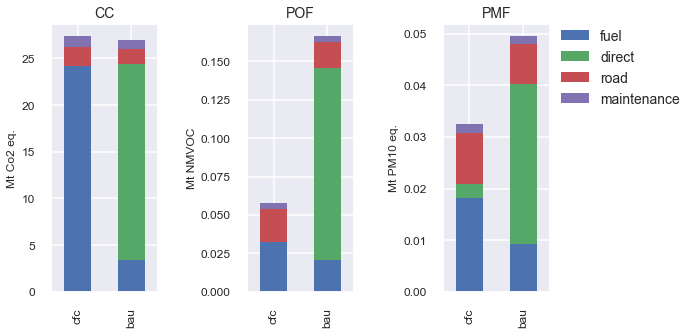

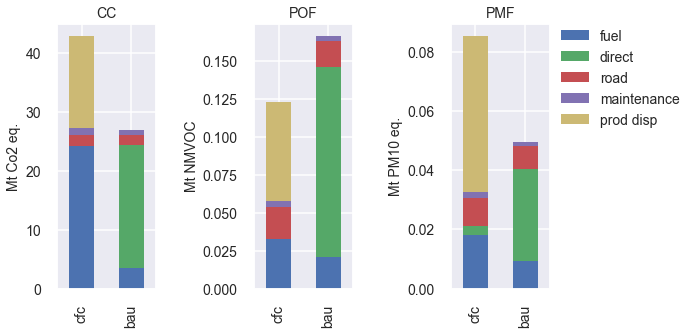

In [152]:
df_old = [results[i][2].sum() for i in range(len(index_list))]
df_old = pd.DataFrame(df_old)
df_old.index = index_list
df_new = [results[i][1].sum() for i in range(len(index_list))]
df_new = pd.DataFrame(df_new)
df_new.index = index_list
plot_cfc_results(df_old,df_new)

ERROR:root:File `'initialize_notebook.ipynb.py'` not found.


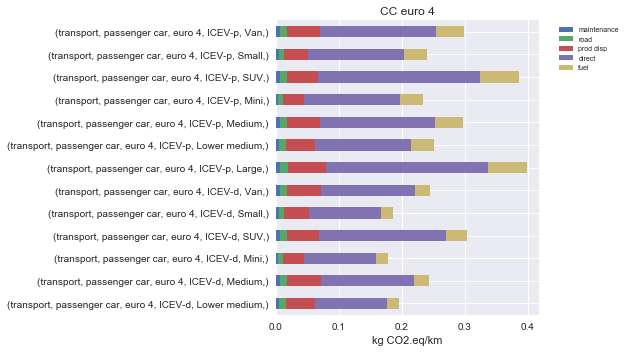

ERROR:root:File `'Input_data.ipynb.py'` not found.


NameError: name 'a_g' is not defined

2575158.0
1237060.0


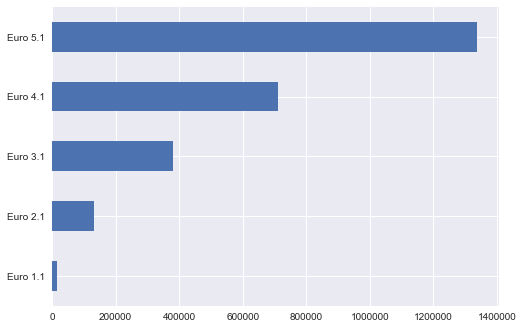

146700.0
5.696737831232103
[('09162  MUENCHEN,STADT                   ', 0.26567474489089693), ('05119  OBERHAUSEN,STADT                 ', 0.44483982534653826), ('15091  WITTENBERG                       ', 0.10103133941047308)]
[('05911  BOCHUM,STADT                     ', 0.43003293285357075), ('05314  BONN,STADT                       ', 0.5319831986632179), ('08111  STUTTGART,STADT                  ', 0.2251357052172783)]
08111  STUTTGART,STADT             
08115  BOEBLINGEN                  
08116  ESSLINGEN                   
08118  LUDWIGSBURG                 
08119  REMS-MURR-KREIS             
08121  HEILBRONN,STADT             
08135  HEIDENHEIM                  
08222  MANNHEIM,STADT              
08236  ENZKREIS                    
08311  FREIBURG I.BREISG.STADT     
08415  REUTLINGEN                  
08416  TUEBINGEN                   
09162  MUENCHEN,STADT              
09564  NUERNBERG,STADT             
09761  AUGSBURG,STADT              
11000  BERLIN                  

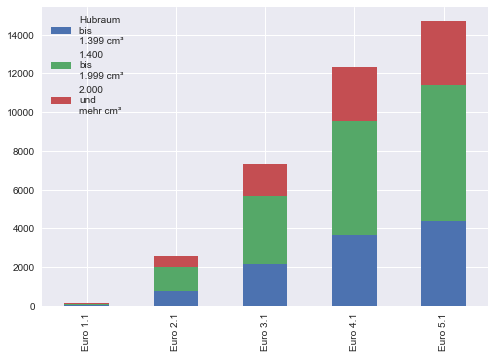

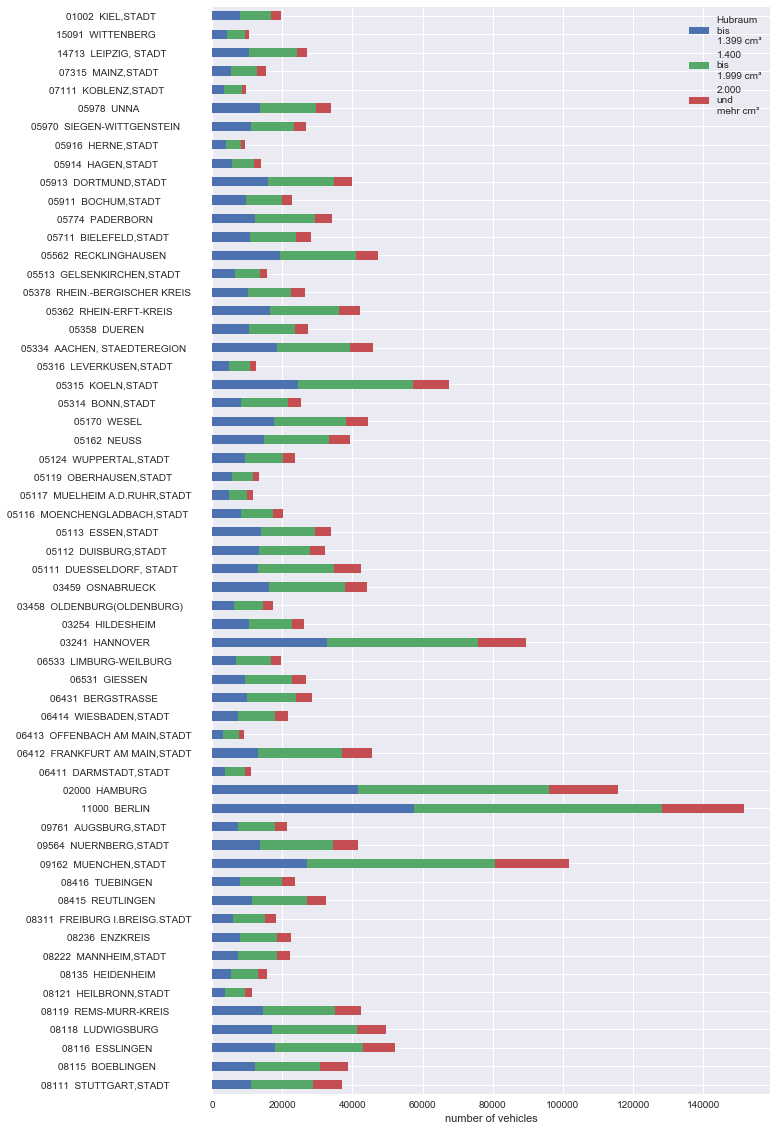

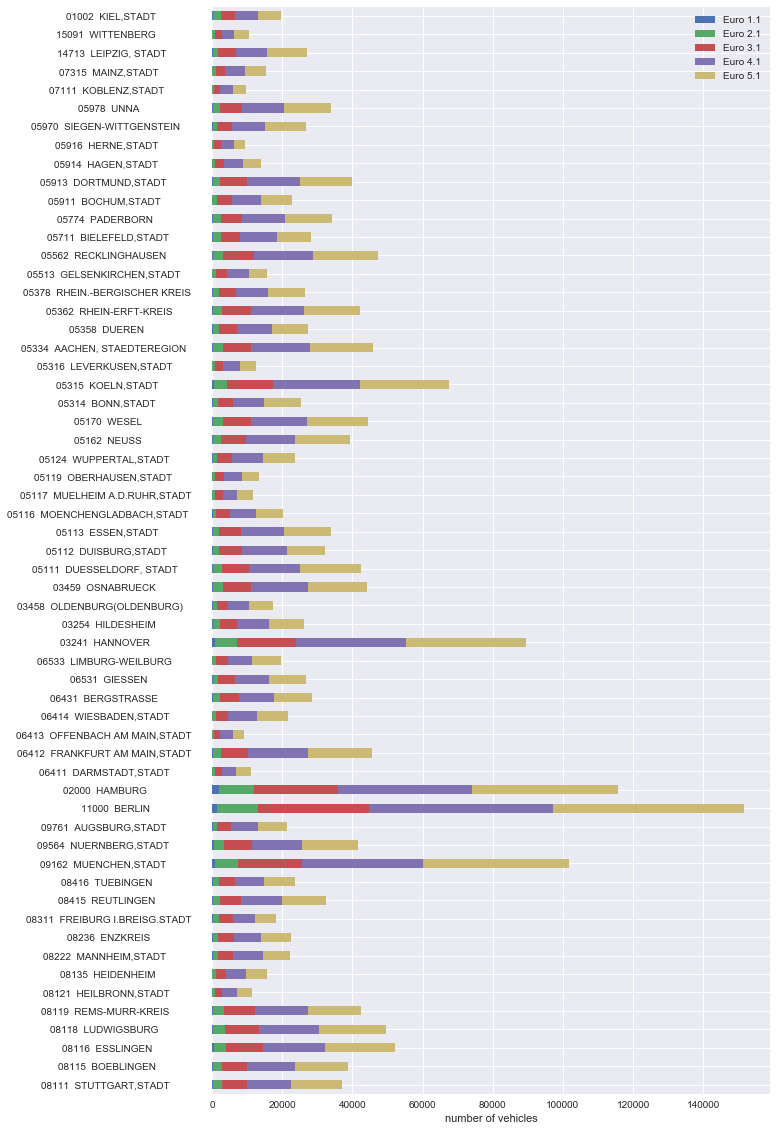

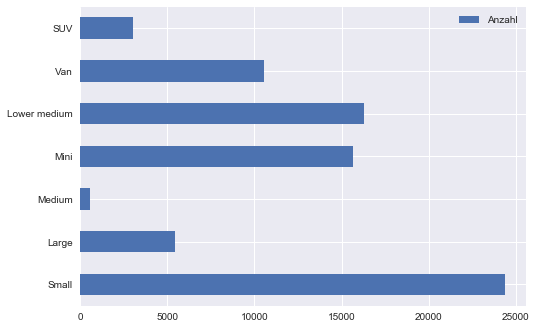

152.0
152.0
2583.0
2583.0
7311.0
7311.0
12332.0
12332.0
14705.760325476906
14705.760325476906
229.0
229.0
2471.9999999999995
2471.9999999999995
7251.0
7251.0
13806.0
13806.0
14981.151231075752
14981.151231075752
423.0
423.0
3556.0
3556.0
10409.0
10409.0
17940.0
17940.0
19832.136375661572
19832.136375661572
193.0
193.0
3352.0
3352.0
9761.0
9761.0
17248.0
17248.0
19137.6723528471
19137.6723528471
260.0
260.0
3238.0
3238.0
8711.999999999998
8711.999999999998
15057.0
15057.0
15084.351549737014
15084.351549737014
39.0
39.0
663.0
663.0
2221.0
2221.0
4269.0
4269.0
4204.415192310279
4204.415192310279
75.0
75.0
968.0000000000001
968.0000000000001
2807.0
2807.0
5850.000000000001
5850.000000000001
5900.663523897352
5900.663523897352
189.0
189.0
1426.0
1426.0
4391.0
4391.0
8379.0
8379.0
7947.564871930157
7947.564871930157
143.0
143.0
1606.0
1606.0
4399.0
4399.0
7862.0
7862.0
8366.637989145787
8366.637989145787
239.0
239.0
1741.0
1741.0
3883.0
3883.0
6376.0
6376.0
6037.503725437151
6037.50372543715

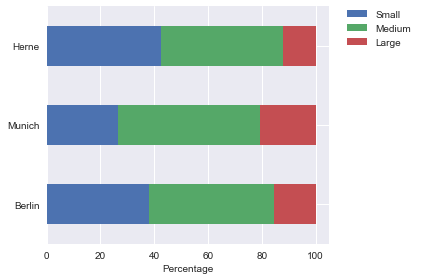

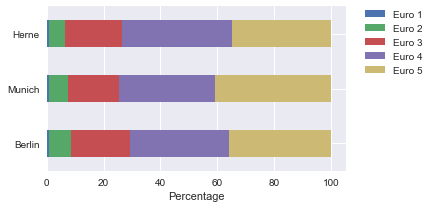

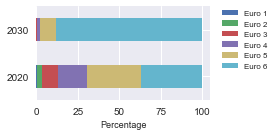

<Figure size 72x72 with 0 Axes>

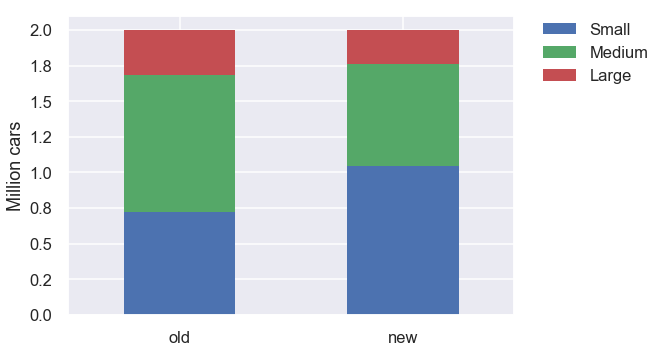

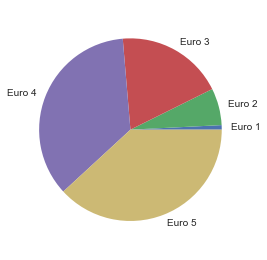

SyntaxError: invalid syntax (<ipython-input-125-42d6484224de>, line 1)

                                            Small        Medium        Large
08111  STUTTGART,STADT               16758.271159  13653.721289  6671.767878
08115  BOEBLINGEN                    18399.498725  14003.516427  6336.136080
08116  ESSLINGEN                     26515.957172  18681.078082  6963.101121
08118  LUDWIGSBURG                   25066.455637  18087.092414  6538.124301
08119  REMS-MURR-KREIS               21375.080221  15206.404536  5769.866793


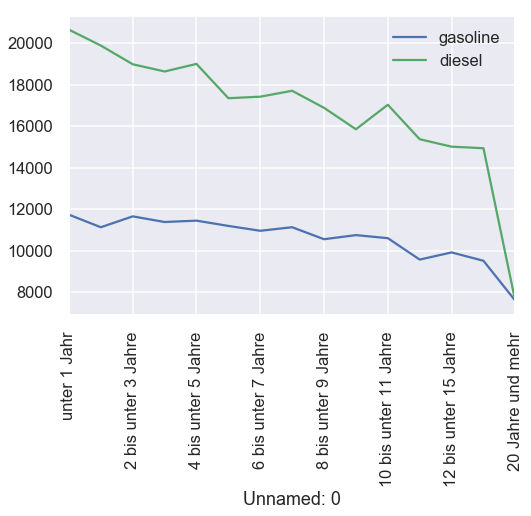

Unnamed: 2
Mini            2.13451
Small           2.13451
Lower medium    2.13451
Medium          4.12542
Large           2.01166
Van             4.12542
SUV             2.01166
dtype: object
Unnamed: 2
Mini            2.13451
Small           2.13451
Lower medium    2.13451
Medium          3.62081
Large           2.01166
Van             3.62081
SUV             2.01166
dtype: object
Unnamed: 2
Mini             1.7015
Small            1.7015
Lower medium     1.7015
Medium          2.30883
Large           1.58303
Van             2.30883
SUV             1.58303
dtype: object
Unnamed: 2
Mini             1.01661
Small            1.01661
Lower medium     1.01661
Medium           1.53623
Large           0.905073
Van              1.53623
SUV             0.905073
dtype: object
Unnamed: 2
Mini            1.06726
Small           1.06726
Lower medium    1.06726
Medium          2.06271
Large           1.00583
Van             2.06271
SUV             1.00583
dtype: object
Unnamed: 2
Mini            1

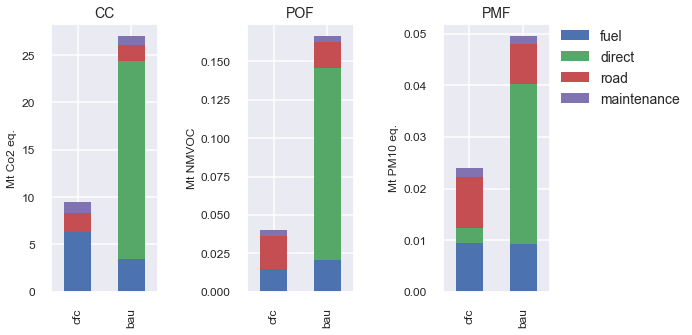

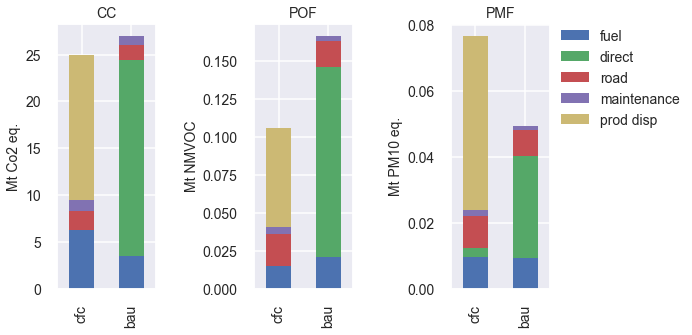

ValueError: No axis named 1 for object type <class 'type'>

In [125]:
%run CFC_calc_base_marginal.ipynb

(<Figure size 576x396 with 3 Axes>,
                   fuel    direct  market for road  maintenance, passenger car  \
 RaR average   0.018076  0.002884         0.009743                    0.001748   
 RaR marginal  0.009531  0.002884         0.009743                    0.001748   
 BAU           0.009333  0.030868         0.007859                    0.001398   
 
               prod_disp  
 RaR average    0.052714  
 RaR marginal   0.052714  
 BAU                 NaN  )

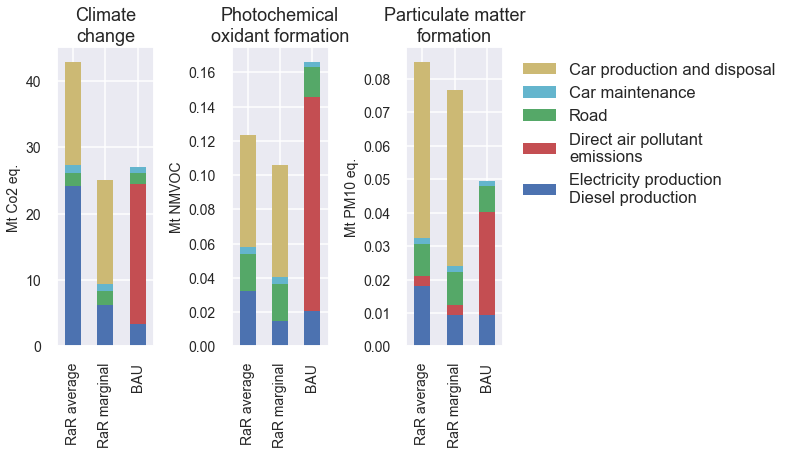

In [155]:
sns.set_context("notebook")
plot_cfc_results_with_marginal(df_old, df_new, DF_MARGINAL)

In [87]:
db = Database('ecoinvent 3.5_cutoff')
elmix = [act for act in db if 'market for electricity low voltage' in act['name'] and 'DE' in act['location']]

In [88]:
elmix = [act for act in db if 'market group for electricity, low voltage' in act['name'] and 'ENTSO' in act['location']][0]

In [89]:
lca = LCA({elmix: 1}, lcia_methods['CC'])
lca.lci()
lca.lcia()
lca.score

0.42902686164492226

I then calculate the difference in emissions in the 4 impact categories for each county. The results are then divided by the total amount of cars in each county, which yields the impact per car which allows for comparasion between the counties. 


In [90]:
savings = pd.DataFrame([results[i][0] for i in np.arange(0,len(index_list))])
savings.index = index_list
savings
savings.columns = cats
savings

,CC,MD,POF,PMF
"08111 STUTTGART,STADT",-0.041391,0.198866,-0.001103,0.000537
08115 BOEBLINGEN,-0.042823,0.205741,-0.001153,0.000554
08116 ESSLINGEN,-0.053024,0.270205,-0.001565,0.000713
08118 LUDWIGSBURG,-0.050085,0.259168,-0.001498,0.000686
08119 REMS-MURR-KREIS,-0.043209,0.216471,-0.001236,0.000574
"08121 HEILBRONN,STADT",-0.011458,0.059618,-0.000336,0.000160
08135 HEIDENHEIM,-0.015651,0.081675,-0.000467,0.000218
"08222 MANNHEIM,STADT",-0.022374,0.115703,-0.000647,0.000311
08236 ENZKREIS,-0.022587,0.115274,-0.000669,0.000304
08311 FREIBURG I.BREISG.STADT,-0.017746,0.091632,-0.000511,0.000244


In [91]:
#Results divided by number of cars in program in each county
mt_to_kg = 1000*1000*1000
rel_savings = (savings*mt_to_kg).div([df_new.sum(axis = 1),df_new.sum(axis = 1),df_new.sum(axis = 1),df_new.sum(axis = 1)])
#fig= plt.figure()
#ax = fig.add_subplot(211)
#ax1 = fig.add_subplot(212)
#widht = 0.4
#ax = pd.concat([df1,df2, rel_savings.loc[index_list[51]]], axis = 1).T[['POF',  'PMF']].plot.barh(figsize = [8,4])
#pd.concat([df1,df2, rel_savings.loc[index_list[51]]], axis = 1).T[['POF',  'PMF']].plot.barh(ax = ax1)
#Plotting for a specific impact category
#ax = rel_savings['POF'].plot.barh(figsize = [10,20])
#ax.set_xlabel('kg. X-eq./car')
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 10)
#plt.tight_layout()
#plt.savefig('POF and PMF.svg')

Comparing the results and the savings to the size distribution and euro distribution in each county to identify reasons for higher increase in emissions etc. 

In [92]:
#Size distribution of all cars in each county 
#tst = pd.DataFrame([df_old.loc[index_list[i]].sum(axis = 0)/sum(df_old.loc[index_list[i]].sum(axis = 0)) for i in np.arange(len(index_list))])
#tst.index = index_list

#tst[['Large', 'Medium']].sum(axis = 1).head()


In [93]:
#Euro distribution of all cars in each county 
tst = pd.DataFrame([df_old.loc[index_list[i]].sum(axis = 1)/sum(df_old.loc[index_list[i]].sum(axis = 1)) for i in np.arange(len(index_list))])
tst.index = index_list

list(zip(index_list,avg_years_remaining))
tst[['Euro 1.1', 'Euro 2.1', 'Euro 3.1']].sum(axis = 1).head()
                                  

ValueError: No axis named 1 for object type <class 'type'>

In [ ]:
#Writing results to excel
with pd.ExcelWriter('output'+scenario+'.xlsx') as writer: 
    savings.to_excel(writer, sheet_name = 'Results')
    rel_savings.to_excel(writer, sheet_name = 'Relative results')

## Changing el. mix  

The results above are calculated using the German mix for charging the BEVs. Want to explore the implications of changing the GWP of the electricity mix

Calculating results were GHG emissions from charging BEVS are reduced by 10%, 20 % and 30 % (relative to the european mix): 

In [ ]:
#Modifying the fuel consumption 
car_lca_agg.iloc[:,4] = car_lca_agg.iloc[:,4]*0.5
car_lca_agg
results_changed_elmix = [calc_cfc_lca(county) for county in index_list]

[results[i][2].sum() for i in range(len(index_list))]
car_lca_agg

In [ ]:


df1 = [results_changed_elmix[i][2].sum() for i in range(len(index_list))]
df1 = pd.DataFrame(df1)
df1.index = index_list
df2 = [results_changed_elmix[i][1].sum() for i in range(len(index_list))]
df2 = pd.DataFrame(df2)
df2.index = index_list
plot_cfc_results(df1,df2)


In [ ]:
#car_lca_agg.iloc[:,17] = car_lca_agg.iloc[:,17]*0.5

#results_changed_lifetime = [calc_cfc_lca(county) for county in index_list]
#df1 = [results_changed_lifetime[i][2].sum() for i in range(len(index_list))]
#df1 = pd.DataFrame(df1)
#df1.index = index_list
#df2 = [results_changed_lifetime[i][1].sum() for i in range(len(index_list))]
#df2 = pd.DataFrame(df2)
#df2.index = index_list
#plot_cfc_results(df1,df2)


In [ ]:
savings_changed_elmix = pd.DataFrame([results_changed_elmix[i][0] for i in np.arange(0,len(index_list))])
savings_changed_elmix.index = index_list
savings_changed_elmix

#Writing results to excel
with pd.ExcelWriter('output_change_elmix6.xlsx') as writer: 
    savings_changed_elmix.to_excel(writer, sheet_name = '50%')
    

In [ ]:
pd.DataFrame([(km_new.loc[km_new.index[13]].sum()),sum(km_old.loc[index_list[13]].sum())]).plot(kind = 'bar')

In [ ]:
car_lca_agg

## Effect on air pollution 

The effect on air pollutant emissions of the BEV program is calculated here. 

First, importing the results for air pollutant emissions per vehicle-kilometer from the notebook "Advanced analysis":

In [ ]:
df_PMFP = pd.read_excel('C:/Users/Andrea/OneDrive - NTNU/Attachments/PSI/jupyter/simplified car calculator/LCI results air poll.xlsx', sheet_name = 'PMFP', index_col=[0,1,2])#.set_index(['Unnamed: 0', 'Unnamed: 1','Unnamed: 2'])
df_PMFP
df_POFP = pd.read_excel('C:/Users/Andrea/OneDrive - NTNU/Attachments/PSI/jupyter/simplified car calculator/LCI results air poll.xlsx', sheet_name = 'POFP', index_col=[0,1,2])#.set_index(['Unnamed: 0', 'Unnamed: 1','Unnamed: 2'])
df_POFP

pmfp_bev = pd.read_excel('C:/Users/Andrea/OneDrive - NTNU/Attachments/PSI/jupyter/simplified car calculator/LCI results air poll.xlsx', sheet_name = 'BEV PMFP', index_col=[0,1])
pofp_bev = pd.read_excel('C:/Users/Andrea/OneDrive - NTNU/Attachments/PSI/jupyter/simplified car calculator/LCI results air poll.xlsx', sheet_name = 'BEV POFP', index_col=[0,1])
pofp_bev = pofp_bev.stack().unstack([1,2])
pmfp_bev = pmfp_bev.stack().unstack([1,2])
pmfp_icev = df_PMFP.stack().unstack([2,3])

pofp_icev = df_POFP.stack().unstack([2,3])

In [ ]:
pmfp_bev

Defining then a function similar as done for each of the LCIA impact categories to calculate the emissions of the cfc and bau scenarios and calculate the savings: 

In [ ]:
def calc_air_poll(county):
    air_pollutants = ['PM2.5', 'PM10', 'NOx', 'SO2', 'NH3', 'NMVOC' ]
    pofp_list_bev, pmfp_list_bev, pofp_list_icev, pmfp_list_icev,savings = [list() for i in range(5)] 

    for index, row in pmfp_bev.iterrows(): 
        for size in ['Small', 'Medium', 'Large']: 
            if size in str(index): 
                temp = pd.DataFrame(row)
                temp[temp.select_dtypes(include=['number']).columns]*=km_new.loc[county,size] 
                pmfp_list_bev.append(temp.T)      

    for index, row in pofp_bev.iterrows(): 
        for size in ['Small', 'Medium', 'Large']: 
            if size in str(index): 
                temp = pd.DataFrame(row)
                temp[temp.select_dtypes(include=['number']).columns]*=km_new.loc[county,size] 
                pofp_list_bev.append(temp.T)    
    c = pd.concat(pofp_list_bev)
    c = c.drop(['NOx'], axis = 1)

    res_air_poll_new = pd.concat([(pd.concat(pmfp_list_bev)), c], axis = 1)


    for index, row in pmfp_icev.iterrows(): 
            for size in ['Small', 'Medium', 'Large']: #loop to multiply correctly lca impact per km with km driven for old cars 
                for euro in ['euro 1', 'euro 2', 'euro 3', 'euro 4', 'euro 5']:
                    if size in str(index[1]) and euro in str(index[0]): 
                        if 'ICEV-d' in str(index[1]):
                            temp1 = pd.DataFrame(row)
                            temp1[temp1.select_dtypes(include=['number']).columns]*=km_old.loc[county].loc[euro,size]
                            pmfp_list_icev.append(temp1.T)
         

    for index, row in pofp_icev.iterrows(): 
            for size in ['Small', 'Medium', 'Large']: #loop to multiply correctly lca impact per km with km driven for old cars 
                for euro in ['euro 1', 'euro 2', 'euro 3', 'euro 4', 'euro 5']:
                    if size in str(index[1]) and euro in str(index[0]): 

                        if 'ICEV-d' in str(index[1]):
                            temp1 = pd.DataFrame(row)
                            temp1[temp1.select_dtypes(include=['number']).columns]*=km_old.loc[county].loc[euro,size]
                            pofp_list_icev.append(temp1.T)
    a = pd.concat(pofp_list_icev)
    #dropping one of the nox columns to avoid double counting 
    a = a.drop(['NOx'], axis = 1)
    res_air_poll_old = pd.concat([pd.concat(pmfp_list_icev) ,a], axis = 1)

    for pollutant in air_pollutants: 
        bau = res_air_poll_old[pollutant].sum(axis = 0).drop('prod_disp')*kg_to_mt
        cfc = res_air_poll_new[pollutant].sum(axis = 0)*kg_to_mt #including the production for new cars 
        savings.append(sum(cfc) - sum(bau))
    return savings, res_air_poll_old, res_air_poll_new


In [ ]:
air_pollutants = ['PM2.5', 'PM10', 'NOx', 'SO2', 'NH3', 'NMVOC' ]
res = [calc_air_poll(county) for county in index_list]
air_poll_savings = pd.DataFrame([res[i][0] for i in np.arange(0,len(index_list))])
air_poll_savings.columns = air_pollutants
air_poll_savings.index = index_list


In [ ]:
rel_air_poll_savings = (air_poll_savings*mt_to_kg).div([df_new.sum(axis = 1),df_new.sum(axis = 1),df_new.sum(axis = 1),df_new.sum(axis = 1),df_new.sum(axis = 1),df_new.sum(axis = 1)])
df_plot_rel = pd.concat([rel_air_poll_savings.iloc[12],rel_air_poll_savings.iloc[15],rel_air_poll_savings.iloc[51]], axis = 1)
df_plot = pd.concat([air_poll_savings.iloc[12],air_poll_savings.iloc[15],air_poll_savings.iloc[51]], axis = 1)
ax = df_plot.plot.bar(rot = 0, figsize = [7,5])
ax.set_ylabel('Mt')
ax.set_xlabel('Air pollutant')
plt.tight_layout()
plt.savefig('air pollutant changes.svg')

In [ ]:
#The emissions of air pollutnats in cfc and bau
cfc = pd.DataFrame([res[i][2].sum() for i in np.arange(0,len(index_list))])

bau = pd.DataFrame([res[i][1].sum() for i in np.arange(0,len(index_list))])
bau.index = index_list
cfc.index = index_list

In [ ]:
#Write only the direct emissions to results
cfc_direct = pd.DataFrame([cfc[poll]['direct'] for poll in air_pollutants]).T*kg_to_mt
cfc_direct.columns = air_pollutants
            
bau_direct = pd.DataFrame([bau[poll]['direct'] for poll in air_pollutants]).T*kg_to_mt
bau_direct.columns = air_pollutants

In [ ]:
import seaborn as sns

In [ ]:
cfc_direct-bau_direct

In [ ]:
#savings_direct = cfc_direct-bau_direct
air_poll = ['PM2.5', 'PM10', 'NOx', 'SO2', 'NH3', 'NMVOC']
cfc_indirect = [cfc[poll][['maintenance, passenger car', 'market for road', 'prod_disp', 'fuel']].sum(axis = 1) for poll in ['PM2.5', 'PM10', 'NOx', 'SO2', 'NH3', 'NMVOC']]
bau_indirect = [bau[poll][['maintenance, passenger car', 'market for road', 'fuel']].sum(axis = 1) for poll in ['PM2.5', 'PM10', 'NOx', 'SO2', 'NH3', 'NMVOC']]
plot_indirect = (pd.DataFrame(cfc_indirect)-pd.DataFrame(bau_indirect)).T*kg_to_mt
plot_indirect.columns = air_poll
plot_df = pd.concat([cfc_direct-bau_direct, plot_indirect], axis = 1, keys = ['direct', 'indirect'])

sns.set_style("darkgrid")

ax = plot_df.sum().unstack().T.plot.bar(stacked = True, rot = 0, fontsize = 14, figsize = (10,5))
ax.set_ylabel('Mt', fontsize = 14)
ax.legend(fontsize = 14)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.set_xlabel('Air pollutants', fontsize = 14)


plt.axhline(y=0, color = 'k', linestyle='-')
plt.tight_layout()
plt.savefig('air pollutant changes tot.svg')

In [ ]:
plot_df.sum(axis = 0).groupby(level=1).sum()

In [ ]:
sns.set_style("darkgrid")
ax.yaxis.grid(True)
ax.xaxis.grid(False)
plot_df.iloc[15].unstack().T.plot.bar(stacked = True, rot = 0, legend = None)
plt.axhline(y=0, color = 'k', linestyle='-')
plt.tight_layout()
plt.savefig('Berlin air pollutants.svg')

In [ ]:
plot_df1 = pd.concat([plot_df['direct'].drop('NOx', axis = 1),plot_df['indirect'].drop('NOx', axis = 1)], keys = ['direct', 'indirect'], axis = 1)
plot_df2 = pd.concat([plot_df['direct'][['NOx']], plot_df['indirect'][['NOx']]], keys = ['direct', 'indirect'], axis = 1)
#fig,ax = plt.subplots()
#plot_df1.sum().unstack().T.plot.bar(stacked = True, rot = 0, fontsize = 12, ax = ax)
#ax2 = ax.twinx()
#plot_df2.sum().unstack().T.plot.bar(stacked = True, rot = 0, fontsize = 12, secondary_y =True, ax = ax2, positions = 4)
sns.set_style("whitegrid")
plot_df2.sum().unstack().T.plot.bar(stacked = True)

plt.axhline(y=0, color = 'k', linestyle='-')

In [ ]:
#Writing results to excel 
 
#writer = pd.ExcelWriter('BEV program results.xlsx', engine='xlsxwriter')

#air_poll_savings.to_excel(writer, sheet_name = 'Change air poll')
#cfc_direct.to_excel(writer, sheet_name = 'CFC direct')
#bau_direct.to_excel(writer, sheet_name = 'BAU direct')
#writer.save()

A report from ministry of environment provides cost estimates for the damage from air pollutants (available from: https://www.umweltbundesamt.de/publikationen/methodenkonvention-30-zur-ermittlung-von). These are then used to quantify the cost of savings of DIRECT emissions: 


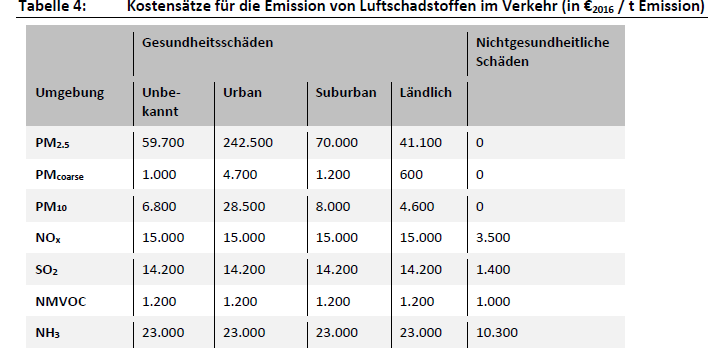




In [ ]:
costs_hh = pd.DataFrame({'Urban, ground level': [242500, 4700, 15000, 14200, 23000, 1200], 'Combustion process in industry, unknown': [242500, 4700, 15000, 14200, 23000, 1200]}).T
costs_hh.columns = ['PM2.5', 'PM10', 'NOx', 'SO2', 'NH3', 'NMVOC']
costs_hh

In [ ]:
#Calculate the savings in direct emissions in t and multiply with costs from the table above
savings_in_direct = (cfc_direct-bau_direct)*1000*1000
cost_savings_HH = savings_in_direct*costs_hh.loc['Urban, ground level']



In [ ]:
cfc_prod = pd.DataFrame([cfc[poll]['prod_disp'] for poll in air_pollutants]).T/1000 #given in ton
cfc_prod.columns = air_pollutants
#in ton
savings_nonprod = pd.DataFrame([cfc[poll][['maintenance, passenger car', 'market for road', 'fuel']].sum(axis = 1) for poll in air_pollutants]).T-pd.DataFrame([bau[poll][['maintenance, passenger car', 'market for road', 'fuel']].sum(axis = 1) for poll in air_pollutants]).T
savings_nonprod = savings_nonprod/1000
savings_nonprod.columns = air_pollutants

#in euro 
COSTS_HH = pd.concat([savings_in_direct*costs_hh.loc['Urban, ground level'],cfc_prod*costs_hh.loc['Combustion process in industry, unknown'], savings_nonprod*costs_hh.loc['Combustion process in industry, unknown']], keys = ['direct', 'production', 'non production'], axis = 1)


In [ ]:
id_list = list()
names_list = list()
for i in COSTS_HH.index: 
    string = str(i).split()
    id_list.append(string[0])
    names_list.append(string[1])

COSTS_HH_plot = COSTS_HH/1000/1000 #in million euros
COSTS_HH_plot.reset_index(inplace = True)
COSTS_HH_plot.index = id_list


#writer = pd.ExcelWriter('Costs human health.xlsx', engine='xlsxwriter')
#COSTS_HH_plot.to_excel(writer, sheet_name = 'Absolute costs')
#pd.DataFrame(names_list).to_excel(writer, sheet_name = 'names')
#df_old.groupby('Statistische Kennziffer und Zulassungsbezirk').sum().sum(axis = 1).to_excel(writer, sheet_name = 'Number of cars')
#writer.save()

In [ ]:
print("The cost savings due to savings in direct emissions are:" + str(sum(COSTS_HH['direct'].sum())/1000/1000/1000) + "billion euros due to human Health damages")

In [ ]:
cfc_prod

## Effect on human health 

### Impact from particulate matter formation

A comparasion between the effect on human health for emission savings within Germany (direct emissinos) vs. the emission increase for the rest of the supply chain (production, disposal and fuel chain) is here done. 

City-specific intake frations for primary PM2.5 emissions for human health are taken from: Fantke et al. (2017) Characterizing Aggregated Exposure to Primary Particulate Matter: Recommended Intake Fractions for Indoor and Outdoor Sources (available from : https://pubs.acs.org/doi/abs/10.1021/acs.est.7b02589).
To arrive at a specific city-specific CF these intake fractions were multiplied by a combined damage and effect factor from van Zelm et al. (2016) Regionalized life cycle impact assessment of air pollution on the global
scale: Damage to human health and vegetation. 

For the cities wihtout an intake fraction in Fantke et al., the average EUROPEAN CITY CHARACTERIZATION FACTOR IS USED OR THE AVERAGE FOR THE CITITES WHERE DATA EXISTS?

For secondary PM, characterisation factors for Germany in van Zelm et al. are used. While Fantke et al. (2017) divide between stack height of emission (using urban ground for calculations) and urban/rural, van Zelm doesn't differ between release height and urban/rural. 

For indirect emissions the global average is used for both primary and secondary PM (taken directly from Van Zelm). 
 

Import the characterization factors from van Zelm and Fantke: 

In [ ]:
#importing CF 
CF_PM = pd.read_excel('C:/Users/Andrea/OneDrive - NTNU/Attachments/PSI/BEV/regionalized intake fractions.xlsx', sheetname = 'CF PM used', header = 1).set_index('Unnamed: 0')
CF_PM.columns = ['PM2.5', 'NH3', 'NOx', 'SO2', 'unit', 'ref']

#the city specific ones 
CF_city_specific = pd.read_excel('C:/Users/Andrea/OneDrive - NTNU/Attachments/PSI/BEV/regionalized intake fractions.xlsx', sheetname = 'CF PM2.5', header = 1).set_index('Unnamed: 0')
CF_city_specific = CF_city_specific[['outdoor urban']].iloc[0:len(CF_city_specific)-2]
CF_city_specific.index = index_list

#using the value for average European city if NAN
#CF_city_specific = CF_city_specific.fillna(CF_PM.loc['Germany', 'PM2.5'])


CF_PM_DE = pd.concat([pd.DataFrame((CF_PM.loc['Germany'][['NH3', 'NOx', 'SO2']])).T]*len(index_list), ignore_index = True)
CF_PM_DE.index = index_list
#CF_city_specific.columns = ['PM2.5', 'NH3', 'NOx', 'SO2', 'unit', 'ref']

#create one df for all CF for each city 
CF_PMF_DE = pd.concat([CF_city_specific, CF_PM_DE], axis = 1)
CF_PMF_DE.columns = ['PM2.5', 'NH3', 'NOx', 'SO2']

#create df with global CF
CF_GLO = pd.concat([pd.DataFrame((CF_PM.loc['Global '][['PM2.5','NH3', 'NOx', 'SO2']].iloc[0])).T]*len(index_list), ignore_index = True)
CF_GLO.index = index_list
CF_GLO.columns = ['PM2.5', 'NH3', 'NOx', 'SO2']

In [ ]:
cities = ["WESEL", "RECKLINGHAUSEN", 'UNNA', 'HAGEN', 'DORTMUND', 'BOCHUM', 'DUISBURG', 'OBERHAUSEN', 'MUELHEIM']
for row, index in CF_city_specific.iterrows(): 
    for i in range(len(cities)): 
        if "ESSEN" in row: 
            value = CF_city_specific.loc[row]
        if cities[i] in row: 
            CF_city_specific.loc[row] = value
CF_city_specific
            

In [ ]:
CF_city_specific = CF_city_specific.fillna(CF_PM.loc['Germany', 'PM2.5'])
CF_city_specific
CF_PMF_DE = pd.concat([CF_city_specific, CF_PM_DE], axis = 1)
CF_PMF_DE.columns = ['PM2.5', 'NH3', 'NOx', 'SO2']

In [ ]:
CF_city_specific = pd.read_excel('C:/Users/Andrea/OneDrive - NTNU/Attachments/PSI/BEV/regionalized intake fractions.xlsx', sheetname = 'CF PM2.5', header = 1).set_index('Unnamed: 0')
CF_city_specific = CF_city_specific[['outdoor urban']].iloc[0:len(CF_city_specific)-2]
CF_city_specific.index = index_list
CF_city_specific.reset_index(inplace = True)
a = CF_city_specific.dropna()

list_no = pd.DataFrame([i for i in range(len(a))])
pd.concat([list_no,a], axis = 1, ignore_index = True).dropna()
a

In [ ]:
n = a['index']
list_names = n.values.tolist()
names = list()
for i in list_names: 
    string = str(i).split()[1]
    if "OLDENBURG" in string: 
        string = "OLDENBURG"
    names.append(string)
names.append("GERMANY")
names

In [ ]:
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
sns.set_style("darkgrid")
ax.plot(a['index'], a['outdoor urban'], "o")
ax.plot('German average', 0.00425, "o")
ax.plot('Global average', 0.000629, "o")
n = names
b = a['outdoor urban'].values.tolist()
c = a['index'].values.tolist()
for i ,txt in enumerate(n):
    if txt == "REUTLINGEN":
        ax.annotate(txt, (c[i], b[i]-0.00035))
    elif txt == "OSNABRUECK":
        ax.annotate(txt, (c[i], b[i]-0.00035))
    elif txt == "KIEL, STADT":
        ax.annotate(txt, (c[i], b[i]-0.00015))
    elif txt == "GERMANY": 
        ax.annotate(txt, ('German average', 0.00425-0.0002))
    else:
        ax.annotate(txt, (c[i], b[i]+0.0002))
ax.set_ylabel('YLL/kg PM2.5 emitted')
ax.annotate('GLOBAL', ('Global average', 0.000629))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.savefig("City specific CF.svg", bbox_inches="tight")

In [ ]:
c

In [ ]:
b = pd.read_excel('C:/Users/Andrea/OneDrive - NTNU/Attachments/PSI/BEV/regionalized intake fractions.xlsx', sheetname = 'iF', header = 1).set_index('Unnamed: 0')
b = b[['outdoor urban']].dropna().iloc[0:20].reset_index().values.tolist()

#fig, ax = plt.subplots()
#plt.xticks(rotation = 90)
#ax.plot(b['Unnamed: 0'], b['outdoor urban'], "o")

for i ,txt in enumerate(n):
    if txt == "REUTLINGEN":
        ax.annotate(txt, (c[i], b[i]-0.00035))
    elif txt == "OSNABRUECK":
        ax.annotate(txt, (c[i], b[i]-0.00035))
    elif txt == "KIEL, STADT":
        ax.annotate(txt, (c[i], b[i]-0.00015))
    elif txt == "AVERAGE": 
        ax.annotate(txt, ('average', 0.00425+0.0002))
    else:
        ax.annotate(txt, (c[i], b[i]+0.0002))
ax.set_ylabel('kg intake/kg emitted')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.savefig("City specific CF.svg", bbox_inches="tight")
ax.set_ylabel('kg intake/kg emitted')

In [ ]:
, #Years saved due to savings in direct emissions

res_PMF_direct = (cfc_direct-bau_direct)[['PM2.5', 'NH3', 'NOx', 'SO2']]*mt_to_kg*CF_PMF_DE
res_PMF_direct

cfc_prod = pd.DataFrame([cfc[poll]['prod_disp'] for poll in air_pollutants]).T #given in kg
cfc_prod.columns = air_pollutants
savings_nonprod = pd.DataFrame([cfc[poll][['maintenance, passenger car', 'market for road', 'fuel']].sum(axis = 1) for poll in air_pollutants]).T-pd.DataFrame([bau[poll][['maintenance, passenger car', 'market for road', 'fuel']].sum(axis = 1) for poll in air_pollutants]).T
savings_nonprod.columns = air_pollutants #given in kg
 
res_PMF_production = cfc_prod[['PM2.5', 'NH3', 'NOx', 'SO2']]*CF_GLO
res_PMF_nonprod = savings_nonprod[['PM2.5', 'NH3', 'NOx', 'SO2']]*CF_GLO ### WHICH CF DO I USE HERE, TYSK ELLER GLOBAL

res_PMF = pd.concat([res_PMF_direct, res_PMF_production, res_PMF_nonprod], keys = ['direct', 'production', 'non production'], axis = 1)

### Impact from photochemical oxidant formation

CF for photochemical oxidant formation from NOx and NMVOC emissions are taken from Van Zelm. For direct emissions the German CF is used, while for indirect emissions the global average is used. The emission source is not taken into account in these factors. 

In [ ]:
CF_POF = pd.read_excel('C:/Users/Andrea/OneDrive - NTNU/Attachments/PSI/BEV/regionalized intake fractions.xlsx', sheetname = 'CF POF used', header = 1).set_index('Unnamed: 0')
CF_POF.index = ['Germany', 'Global']

In [ ]:
#multiply the direct emission savings in nox and nmvoc with the german characterisation factor for human health impact from POF
res_POF_direct = (cfc_direct-bau_direct)[['NOx', 'NMVOC']]*mt_to_kg*CF_POF[['NOx', 'NMVOC']].loc['Germany']
#multiply the production emissions in nox and nmvoc with the global CF 
res_POF_production = cfc_prod[['NOx', 'NMVOC']]*CF_POF[['NOx', 'NMVOC']].loc['Global']
res_POF_nonproduction = savings_nonprod[['NOx', 'NMVOC']]*CF_POF[['NOx', 'NMVOC']].loc['Global'] #use the global for non production emissions
res_POF = pd.concat([res_POF_direct, res_POF_production, res_POF_nonproduction], keys = ['direct', 'production', 'non production'], axis = 1)

In [ ]:
#with pd.ExcelWriter('health impacts results.xlsx') as writer: 
#    res_PMF.to_excel(writer, sheet_name = 'PMF')
#    res_POF.to_excel(writer, sheet_name = 'POF')

In [ ]:
res_PMF.sum(axis = 1).to_excel('output changed CF essen.xlsx')

In [ ]:
plot_cf = pd.concat([CF_PMF_DE.iloc[15], CF_GLO.iloc[15]], axis = 1, keys = ['Direct emissions', 'Indirect emissions'])
pof_cf = pd.DataFrame.from_dict({'Direct emissions': [CF_POF.loc['Germany', 'NMVOC']], 'Indirect emissions':[CF_POF.loc['Germany', 'NMVOC']]})
#pd.DataFrame.from_dict(data, orient='index',
#...                        columns=['A', 'B', 'C', 'D'])

In [ ]:
pof_cf.index = ['NMVOC']
plot_cf = plot_cf.append(pof_cf)
ax = plot_cf.T.plot.bar(rot = 0)
ax.set_ylabel('DALY / kg emissions')
plt.savefig('impact of emissions.svg', bbox_inches = 'tight')

<iframe title="Cost savings from reduction in direct air pollutant emissions" aria-label="Germany districts (2016) choropleth map" src="//datawrapper.dwcdn.net/w7qQx/1/" scrolling="no" frameborder="0" style="border: none;" width="682" height="586"></iframe>

<iframe title="Cost savings from reduction in direct air pollutant emissions" aria-label="Germany districts (2016) choropleth map" src="//datawrapper.dwcdn.net/w7qQx/1/" scrolling="no" frameborder="0" style="border: none;" width="682" height="586"></iframe>

NH3     -0.002763
NMVOC   -0.003693
NOx     -0.017245
PM10     0.003480
PM2.5    0.002821
SO2      0.015026
dtype: float64

In [ ]:
NH3     -0.004640
NMVOC   -0.009282
NOx     -0.033748
PM10     0.003968
PM2.5    0.003289
SO2      0.015126


In [ ]:
bev = plot_df.sum(axis = 0).groupby(level=1).sum()
bev = bev.append(pd.DataFrame(['GHG'], [savings['CC'].sum()]).reset_index().set_index(0)).sum(axis = 1)

In [ ]:
early = pd.DataFrame.from_dict({'air poll': ['NH3', 'NMVOC', 'NOx', 'PM10', 'PM2.5', 'SO2', 'GHG'], 'number': [-0.004640, -0.009282, -0.033748, 0.003968, 0.003289, 0.015126, 0.52]}).set_index('air poll')
bev_marg = pd.DataFrame.from_dict({'air poll': ['NH3', 'NMVOC', 'NOx', 'PM10', 'PM2.5', 'SO2', 'GHG'], 'number': [0.000861, 0.008, -0.091, 0.01, 0.012, 0.073, -5.1]}).set_index('air poll')

#In the Lenski program (CARS in US) there were only 700 000 cars, so multiply by 2.86 (2mill/700 000)
lenski = pd.DataFrame.from_dict({'air poll': ['NH3', 'NMVOC', 'NOx', 'PM10', 'PM2.5', 'SO2', 'GHG'], 'number': [0, 0, -0.0172, 0.0004, 0.0007, 0.0019, -2.9]}).set_index('air poll')*2.86 #0 is because of 0 data

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
#ax.set_xlabel('Mt', fontsize = 14)
#ax.set_ylabel('', fontsize = 14)
changed_color_order = sns.color_palette()[0], sns.color_palette()[2], sns.color_palette()[1], sns.color_palette()[4], sns.color_palette()[3]
pd.concat([bev,bev_marg, early, lenski], axis = 1, keys = ['BEV program', 'BEV marginal', '2009 program', 'CARS Lenski et al. (2013)']).T[['SO2', 'PM2.5', 'NOx']].T.plot.bar(fontsize = 14, legend = None, ax = ax2, color = changed_color_order)
pd.concat([bev,bev_marg, early, lenski], axis = 1, keys = ['BEV program', 'BEV marginal', '2009 program', 'CARS Lenski et al. (2013)']).T[['GHG']].T.plot.bar(fontsize = 14, legend = None, ax = ax1, figsize = (9,7), color = changed_color_order)


#ax.set_title('Comparasion of BEV program to 2009 program and CARS', fontsize=14)
handles, labels = ax2.get_legend_handles_labels()
#labels = ['Electricity production\nDiesel production', 'Direct air pollutant\nemissions', 'Road', 'Car maintenance', 'Car production and disposal']
labels = ['EV program (average)','EV program (marginal)', '2009 program DE', '2009 program US']
ax2.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor = (1.05,1), fontsize = 14)
ax2.set_xlabel('')
ax1.set_xlabel('')
ax1.set_ylabel('Mt')

#plt.tight_layout()
plt.subplots_adjust(wspace = 0.3)
plt.savefig('air poll comparasion .svg', bbox_inches = 'tight')

In [ ]:
pd.concat([bev,bev_marg, early, lenski], axis = 1, keys = ['BEV program', 'BEV marginal', '2009 program', 'CARS Lenski et al. (2013)']).T[['SO2', 'PM2.5', 'NOx', 'GHG']]

In [ ]:
pd.concat([bev,bev_marg, early, lenski], axis = 1, keys = ['BEV program', 'BEV marginal', '2009 program', 'CARS Lenski et al. (2013)']).T[['SO2', 'PM2.5', 'NOx']].T

In [ ]:
data = pd.concat([bev,bev_marg, early, lenski], axis = 1, keys = ['BEV program', 'BEV marginal', '2009 program', 'CARS Lenski et al. (2013)']).T
data.loc['BEV program', 'GHG'] = savings.sum()['CC']
ax = data.reset_index().set_index('level_0')[['GHG']].T.plot(kind = 'bar', legend = None, figsize = (3,5.25))
handles, labels = ax.get_legend_handles_labels()

labels = ['Current EV program (average)','Current EV program (marginal)', '2009 program', '2009 program US']
ax.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor = (1,1), fontsize = 14)
plt.savefig('a.svg', bbox_inches = 'tight')

In [ ]:
ax = pd.concat([(km_new.sum()),(km_old.sum())], keys = ['Diesel', 'BEV']).sum(level=0).plot.bar(figsize = (4,3), rot = 0, fontsize = 12)
plt.yticks([])
plt.savefig('mileage illu.svg', bbox_inches = 'tight')

In [ ]:
sns.color_palette().as_hex()